In [319]:
import json
from datasets import load_from_disk

dataset = load_from_disk("./data/default/train_dataset")
train_dataset = dataset['train']
eval_dataset = dataset['validation']

with open("./data/wikipedia_documents.json", "r", encoding="utf-8") as file:
    data = json.load(file)
wiki_docs = list(dict.fromkeys([v["text"] for v in data.values()]))

# WIKI DOCUMENT


In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoTokenizer

multilingual_tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
klue_tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

# tokenize
tokenized_wiki_docs = []
for wiki_doc in wiki_docs:
    tokenized_wiki_docs.append((multilingual_tokenizer.tokenize(wiki_doc), klue_tokenizer.tokenize(wiki_doc)))

Token indices sequence length is longer than the specified maximum sequence length for this model (1335 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1131 > 512). Running this sequence through the model will result in indexing errors


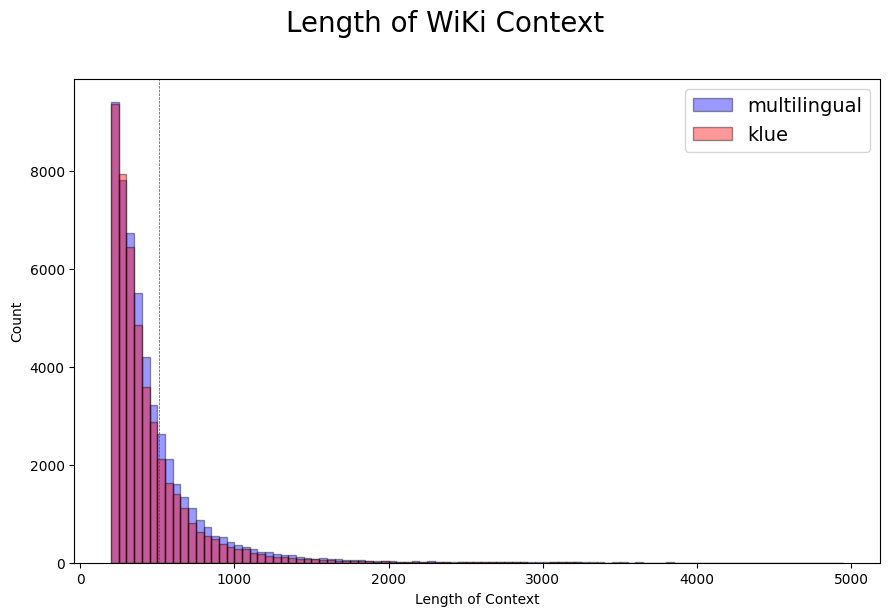

In [321]:
multilingual_tokenized_wiki_docs_len = list(map(lambda x: len(x[0]),tokenized_wiki_docs))
klue_tokenized_wiki_docs_len = list(map(lambda x: len(x[1]),tokenized_wiki_docs))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
fig.suptitle("Length of WiKi Context", fontsize=20, y=1.02)

ax.hist(multilingual_tokenized_wiki_docs_len, bins=np.arange(200, 5000, 50), alpha=0.4, color='blue', edgecolor='black', label='multilingual')
ax.hist(klue_tokenized_wiki_docs_len, bins=np.arange(200, 5000, 50), alpha=0.4, color='red', edgecolor='black', label='klue')
ax.set_xlabel('Length of Context')
ax.set_ylabel('Count')
ax.legend(fontsize=14)
plt.axvline(x=512, color='red', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

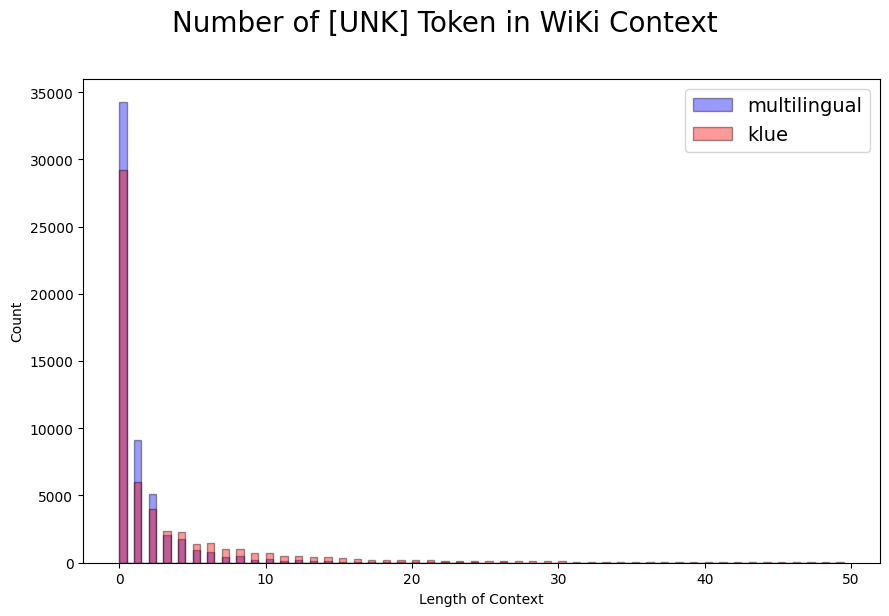

In [322]:
multilingual_wiki_unk_token = list(map(lambda x: x[0].count('[UNK]'),tokenized_wiki_docs))
klue_wiki_unk_token = list(map(lambda x: x[1].count('[UNK]'),tokenized_wiki_docs))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
fig.suptitle("Number of [UNK] Token in WiKi Context", fontsize=20, y=1.02)

ax.hist(multilingual_wiki_unk_token, bins=np.arange(0, 50, 0.5), alpha=0.4, color='blue', edgecolor='black', label='multilingual')
ax.hist(klue_wiki_unk_token, bins=np.arange(0, 50, 0.5), alpha=0.4, color='red', edgecolor='black', label='klue')
ax.set_xlabel('Length of Context')
ax.set_ylabel('Count')
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()


# Default Dataset

In [323]:
tokenized_train_docs = []
tokenized_eval_docs = []
tokenized_train_questions = []
tokenized_eval_questions = []

for example in train_dataset:
    tokenized_train_docs.append((multilingual_tokenizer.tokenize(example['context']), klue_tokenizer.tokenize(example['context'])))
    tokenized_train_questions.append((multilingual_tokenizer.tokenize(example['question']), klue_tokenizer.tokenize(example['question'])))

for examples in eval_dataset:
    tokenized_eval_docs.append((multilingual_tokenizer.tokenize(examples['context']), klue_tokenizer.tokenize(examples['context'].replace("\\n", " "))))
    tokenized_eval_questions.append((multilingual_tokenizer.tokenize(examples['question']), klue_tokenizer.tokenize(examples['question'])))

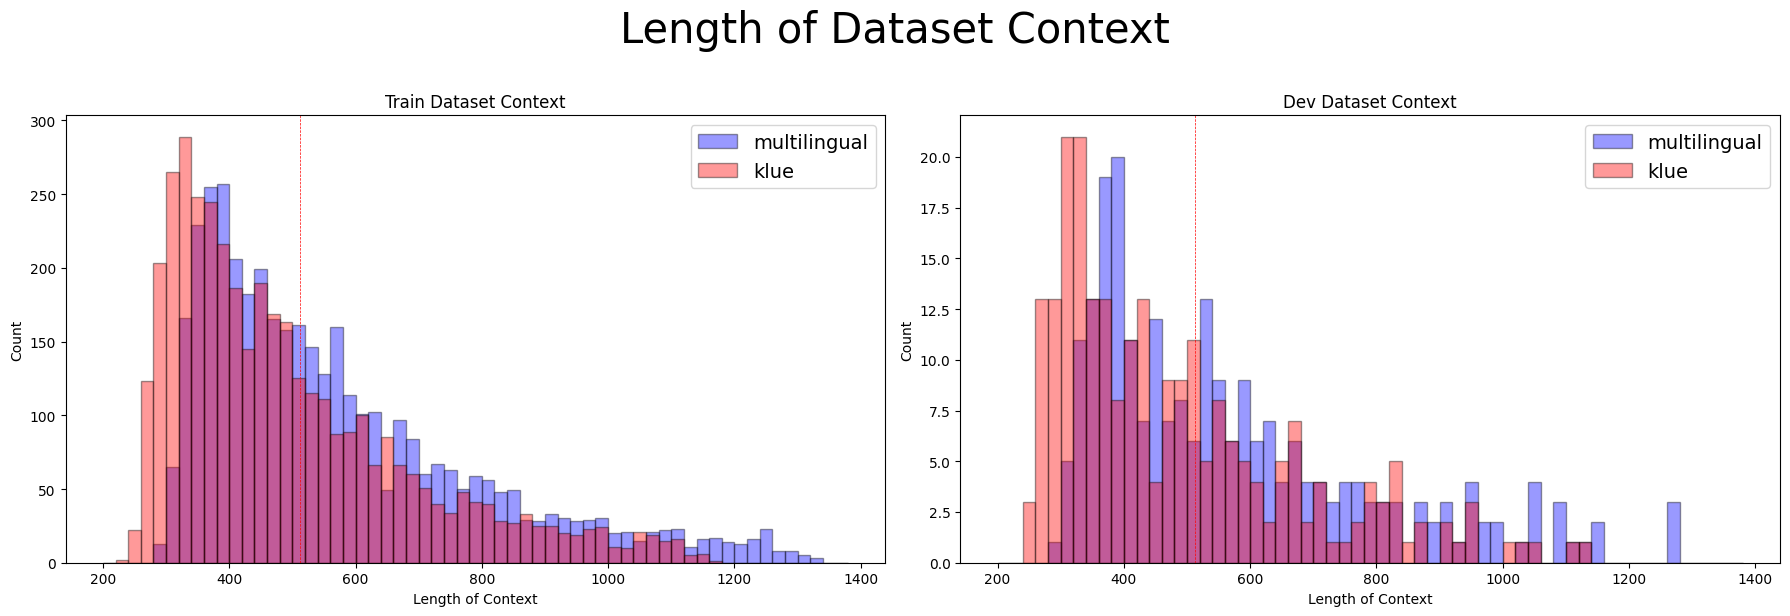

In [324]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Length of Dataset Context", fontsize=30, y=1.02)

i=0
axes[0].set_title('Train Dataset Context')
axes[1].set_title('Dev Dataset Context')
for text_list in [tokenized_train_docs, tokenized_eval_docs]:
    multilingual_dataset_context_len = list(map(lambda x: len(x[0]),text_list))
    klue_dataset_context_len = list(map(lambda x: len(x[1]),text_list))

    axes[i].hist(multilingual_dataset_context_len, bins=np.arange(200, 1400, 20), alpha=0.4, color='blue', edgecolor='black', label='multilingual')
    axes[i].hist(klue_dataset_context_len, bins=np.arange(200, 1400, 20), alpha=0.4, color='red', edgecolor='black', label='klue')
    axes[i].set_xlabel('Length of Context')
    axes[i].set_ylabel('Count')
    axes[i].legend(fontsize=14)
    axes[i].axvline(x=512, color='red', linestyle='--', linewidth=0.5)
    i += 1

plt.tight_layout()
plt.show()

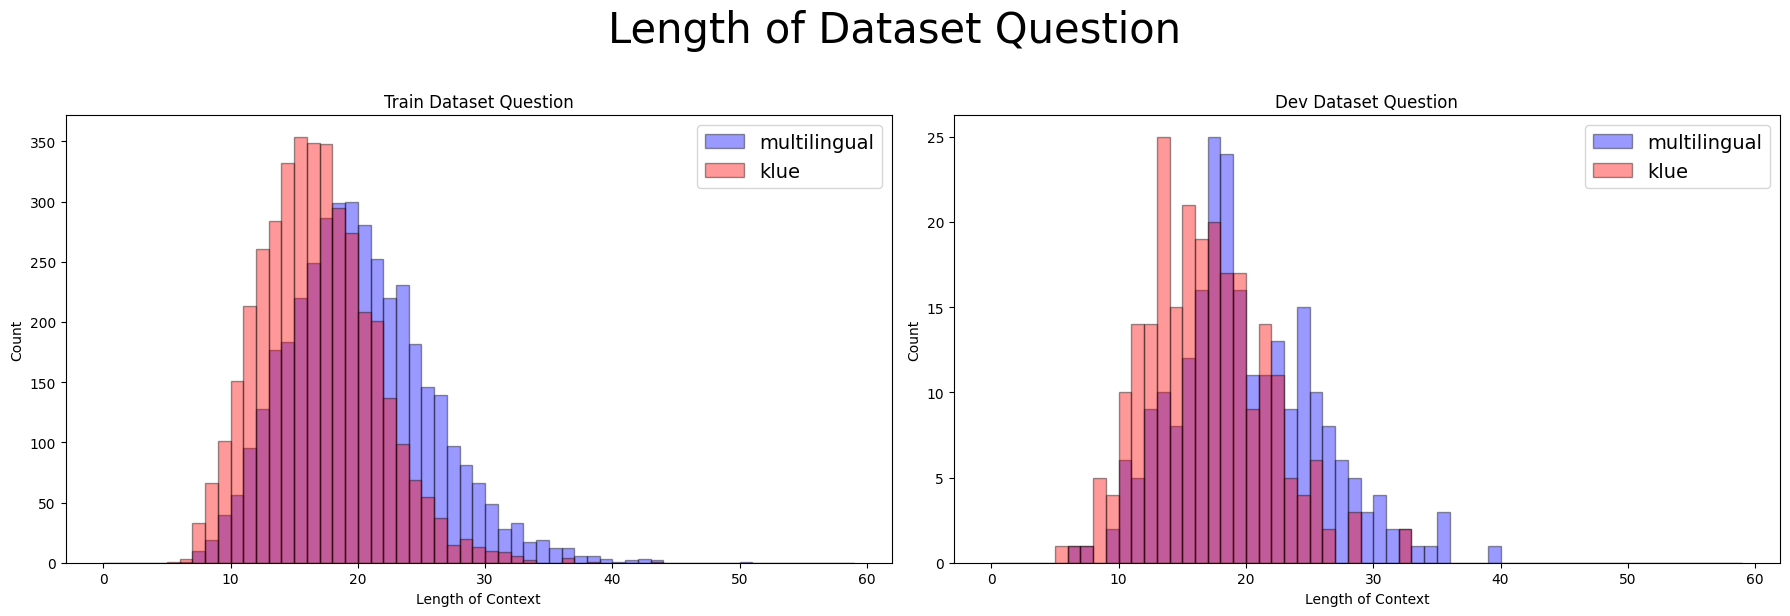

In [325]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Length of Dataset Question", fontsize=30, y=1.02)

i=0
axes[0].set_title('Train Dataset Question')
axes[1].set_title('Dev Dataset Question')
for text_list in [tokenized_train_questions, tokenized_eval_questions]:
    multilingual_dataset_question_len = list(map(lambda x: len(x[0]),text_list))
    klue_dataset_question_len = list(map(lambda x: len(x[1]),text_list))

    axes[i].hist(multilingual_dataset_question_len, bins=np.arange(0, 60, 1), alpha=0.4, color='blue', edgecolor='black', label='multilingual')
    axes[i].hist(klue_dataset_question_len, bins=np.arange(0, 60, 1), alpha=0.4, color='red', edgecolor='black', label='klue')
    axes[i].set_xlabel('Length of Context')
    axes[i].set_ylabel('Count')
    axes[i].legend(fontsize=14)
    i += 1

plt.tight_layout()
plt.show()

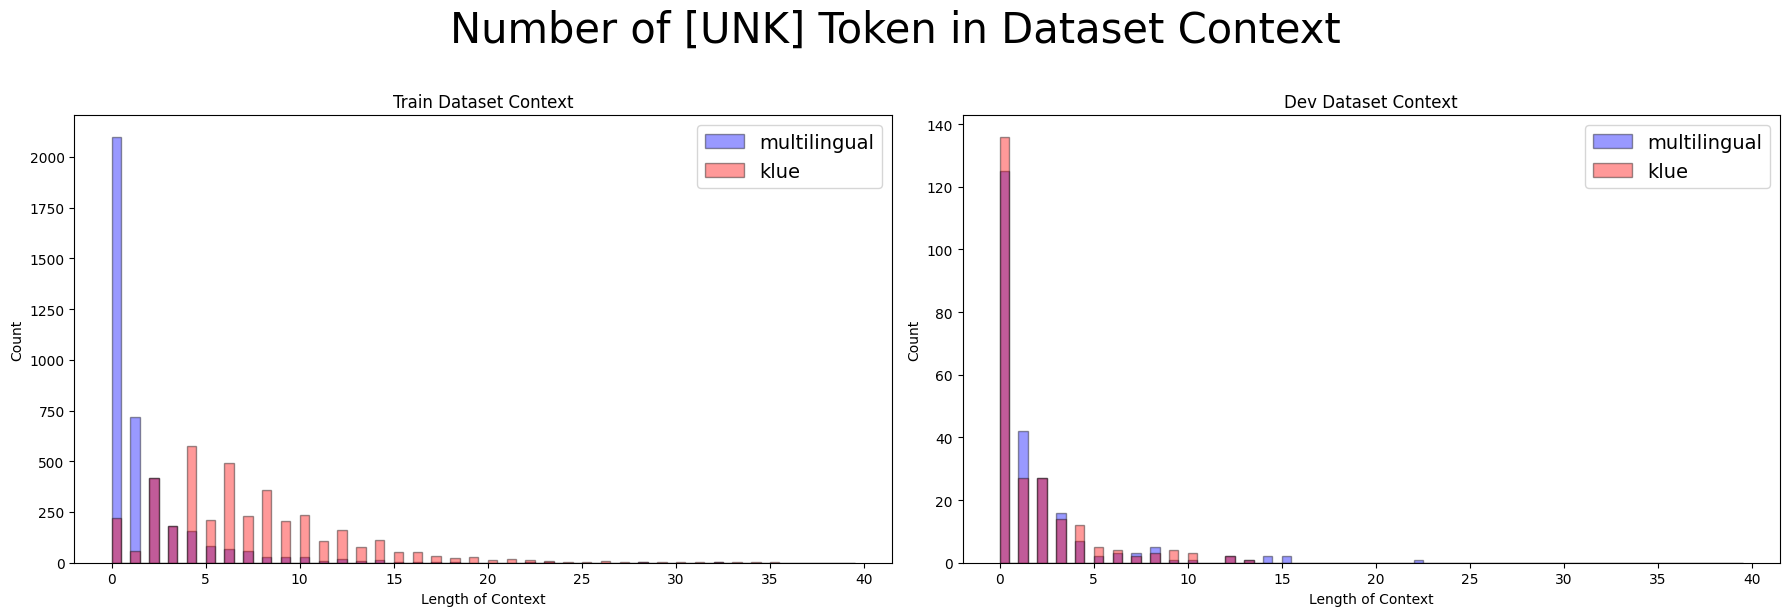

In [331]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Number of [UNK] Token in Dataset Context", fontsize=30, y=1.02)

i=0
axes[0].set_title('Train Dataset Context')
axes[1].set_title('Dev Dataset Context')
for text_list in [tokenized_train_docs, tokenized_eval_docs]:
    multilingual_dataset_context_unk_token = list(map(lambda x: x[0].count('[UNK]'),text_list))
    klue_dataset_context_unk_token = list(map(lambda x: x[1].count('[UNK]'),text_list))

    axes[i].hist(multilingual_dataset_context_unk_token, bins=np.arange(0, 40, 0.5), alpha=0.4, color='blue', edgecolor='black', label='multilingual')
    axes[i].hist(klue_dataset_context_unk_token, bins=np.arange(0, 40, 0.5), alpha=0.4, color='red', edgecolor='black', label='klue')
    axes[i].set_xlabel('Length of Context')
    axes[i].set_ylabel('Count')
    axes[i].legend(fontsize=14)
    i += 1

plt.tight_layout()
plt.show()

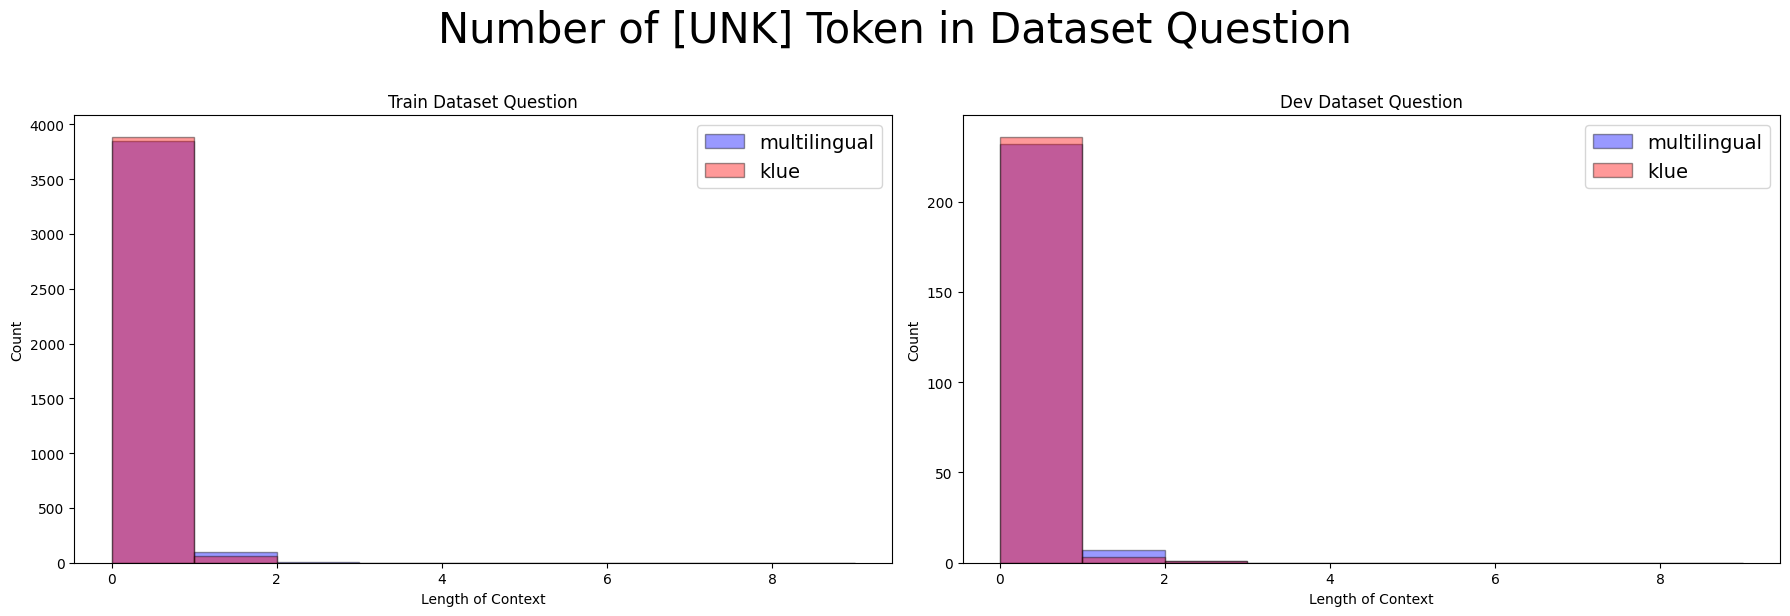

In [330]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Number of [UNK] Token in Dataset Question", fontsize=30, y=1.02)

i=0
axes[0].set_title('Train Dataset Question')
axes[1].set_title('Dev Dataset Question')
for text_list in [tokenized_train_questions, tokenized_eval_questions]:
    multilingual_dataset_question_unk_token = list(map(lambda x: x[0].count('[UNK]'),text_list))
    klue_dataset_question_unk_token = list(map(lambda x: x[1].count('[UNK]'),text_list))

    axes[i].hist(multilingual_dataset_question_unk_token, bins=np.arange(0, 10, 1), alpha=0.4, color='blue', edgecolor='black', label='multilingual')
    axes[i].hist(klue_dataset_question_unk_token, bins=np.arange(0, 10, 1), alpha=0.4, color='red', edgecolor='black', label='klue')
    axes[i].set_xlabel('Length of Context')
    axes[i].set_ylabel('Count')
    axes[i].legend(fontsize=14)
    i += 1

plt.tight_layout()
plt.show()

In [328]:
tokenized_train_answers_start = []
tokenized_eval_answers_start = []

for example in train_dataset:
    for answer_start in example['answers']['answer_start']:
        tokenized_train_answers_start.append(answer_start)

for example in eval_dataset:
    for answer_start in example['answers']['answer_start']:
        tokenized_eval_answers_start.append(answer_start)

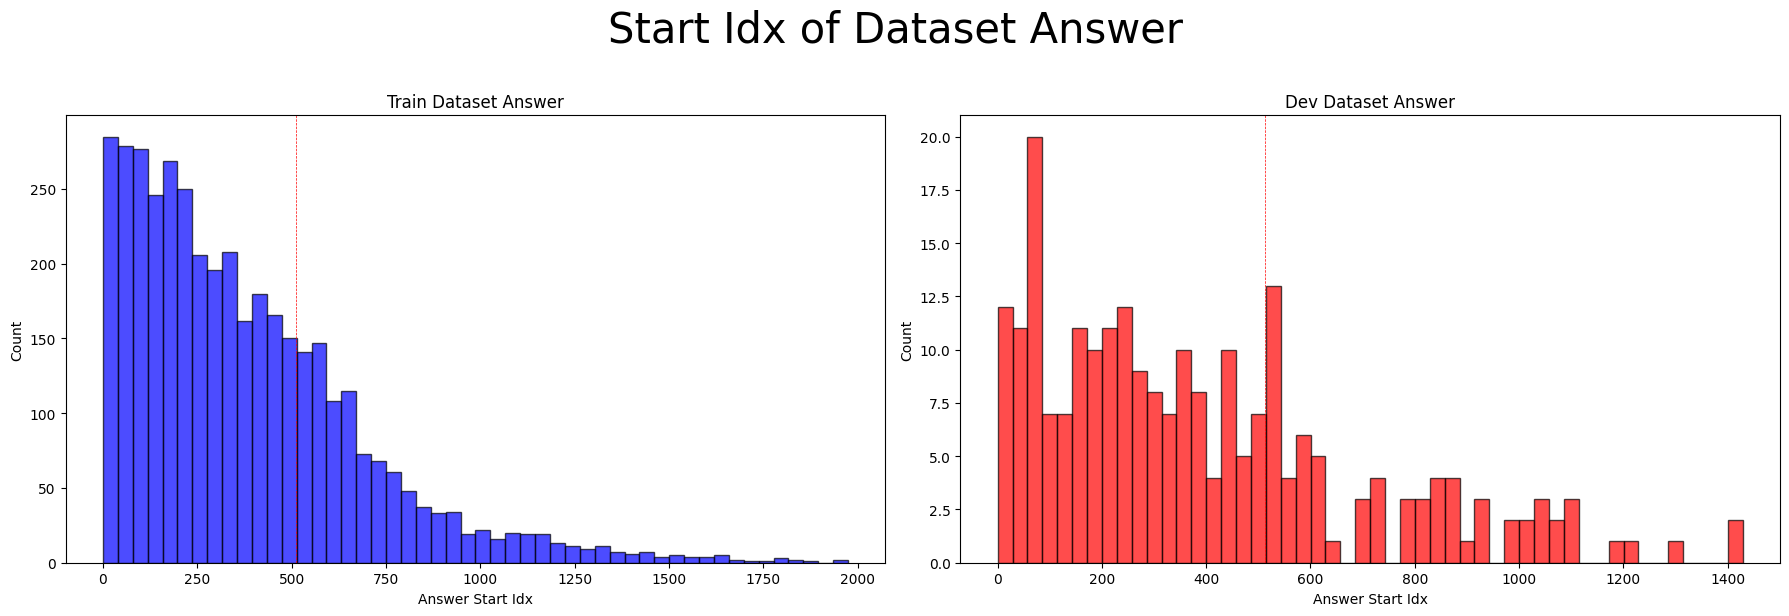

In [329]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Start Idx of Dataset Answer", fontsize=30, y=1.02)

axes[0].hist(tokenized_train_answers_start, bins=50, alpha=0.7, edgecolor='black', color='blue')
axes[0].set_title('Train Dataset Answer')
axes[0].set_xlabel('Answer Start Idx')
axes[0].set_ylabel('Count')
axes[0].axvline(x=512, color='red', linestyle='--', linewidth=0.5)


axes[1].hist(tokenized_eval_answers_start, bins=50, alpha=0.7, edgecolor='black', color='red')
axes[1].set_title('Dev Dataset Answer')
axes[1].set_xlabel('Answer Start Idx')
axes[1].set_ylabel('Count')
axes[1].axvline(x=512, color='red', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

`answer_start`가 512가 넘어가는 경우는 DenseRetrieval가 학습하기 어렵다.